<a href="https://colab.research.google.com/github/kennicew/CHD-Nexus/blob/main/CHD_Nexus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['framingham_.csv']))
df.info()

Saving framingham_.csv to framingham_.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int

#Data Visualization

In [ ]:
df.head() #displays first 5 rows of data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.describe() # summary statistics of numerical columns

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

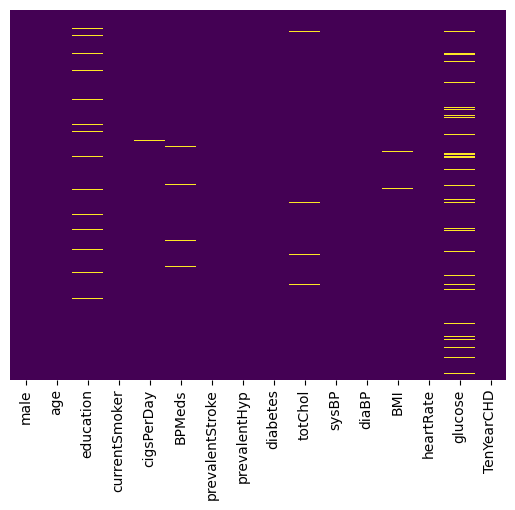

In [ ]:
#generate heatmap to illustrate distribution of null data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
df.dropna(inplace=True) #clean up missing data
df.info() #only 3656 rows of data ramaining (originally 4239)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


<Axes: >

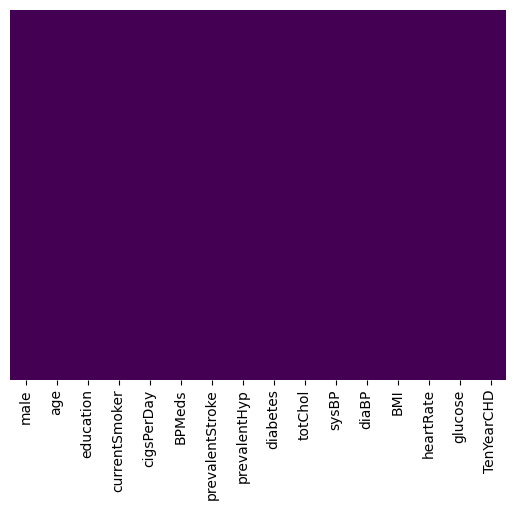

In [ ]:
#heatmap confirms all null data is dropped
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

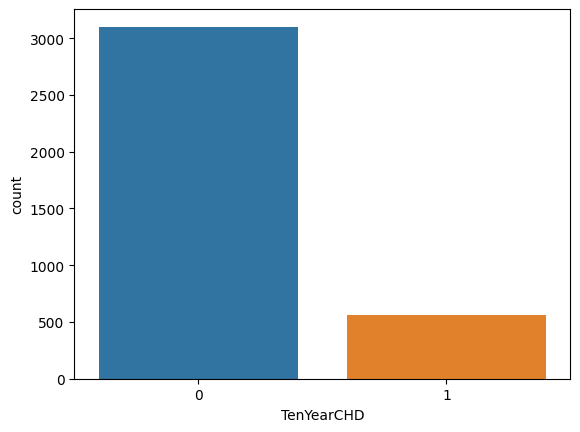

In [ ]:
sns.countplot(x='TenYearCHD', data=df)
plt.show() # Visualize the distribution of the target variable 'TenYearCHD'

#Correlation Plots

In [ ]:
# numerical variables/features
df_num_feature = df[['age', 'cigsPerDay', 'totChol', 'diaBP', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

<Axes: xlabel='age', ylabel='cigsPerDay'>

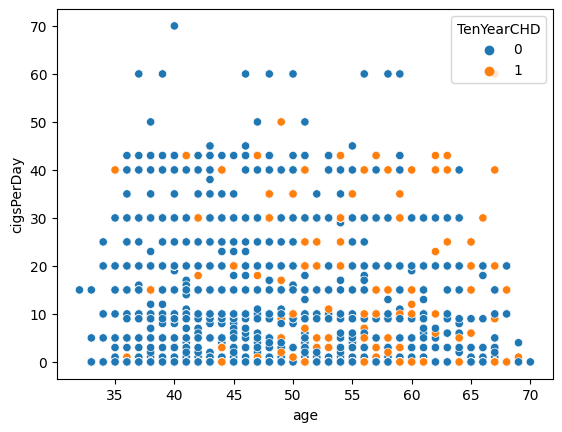

In [ ]:
sns.scatterplot(data=df_num_feature, x='age', y='cigsPerDay', hue='TenYearCHD')
#can eyeball that the higher the age, the more CHD cases

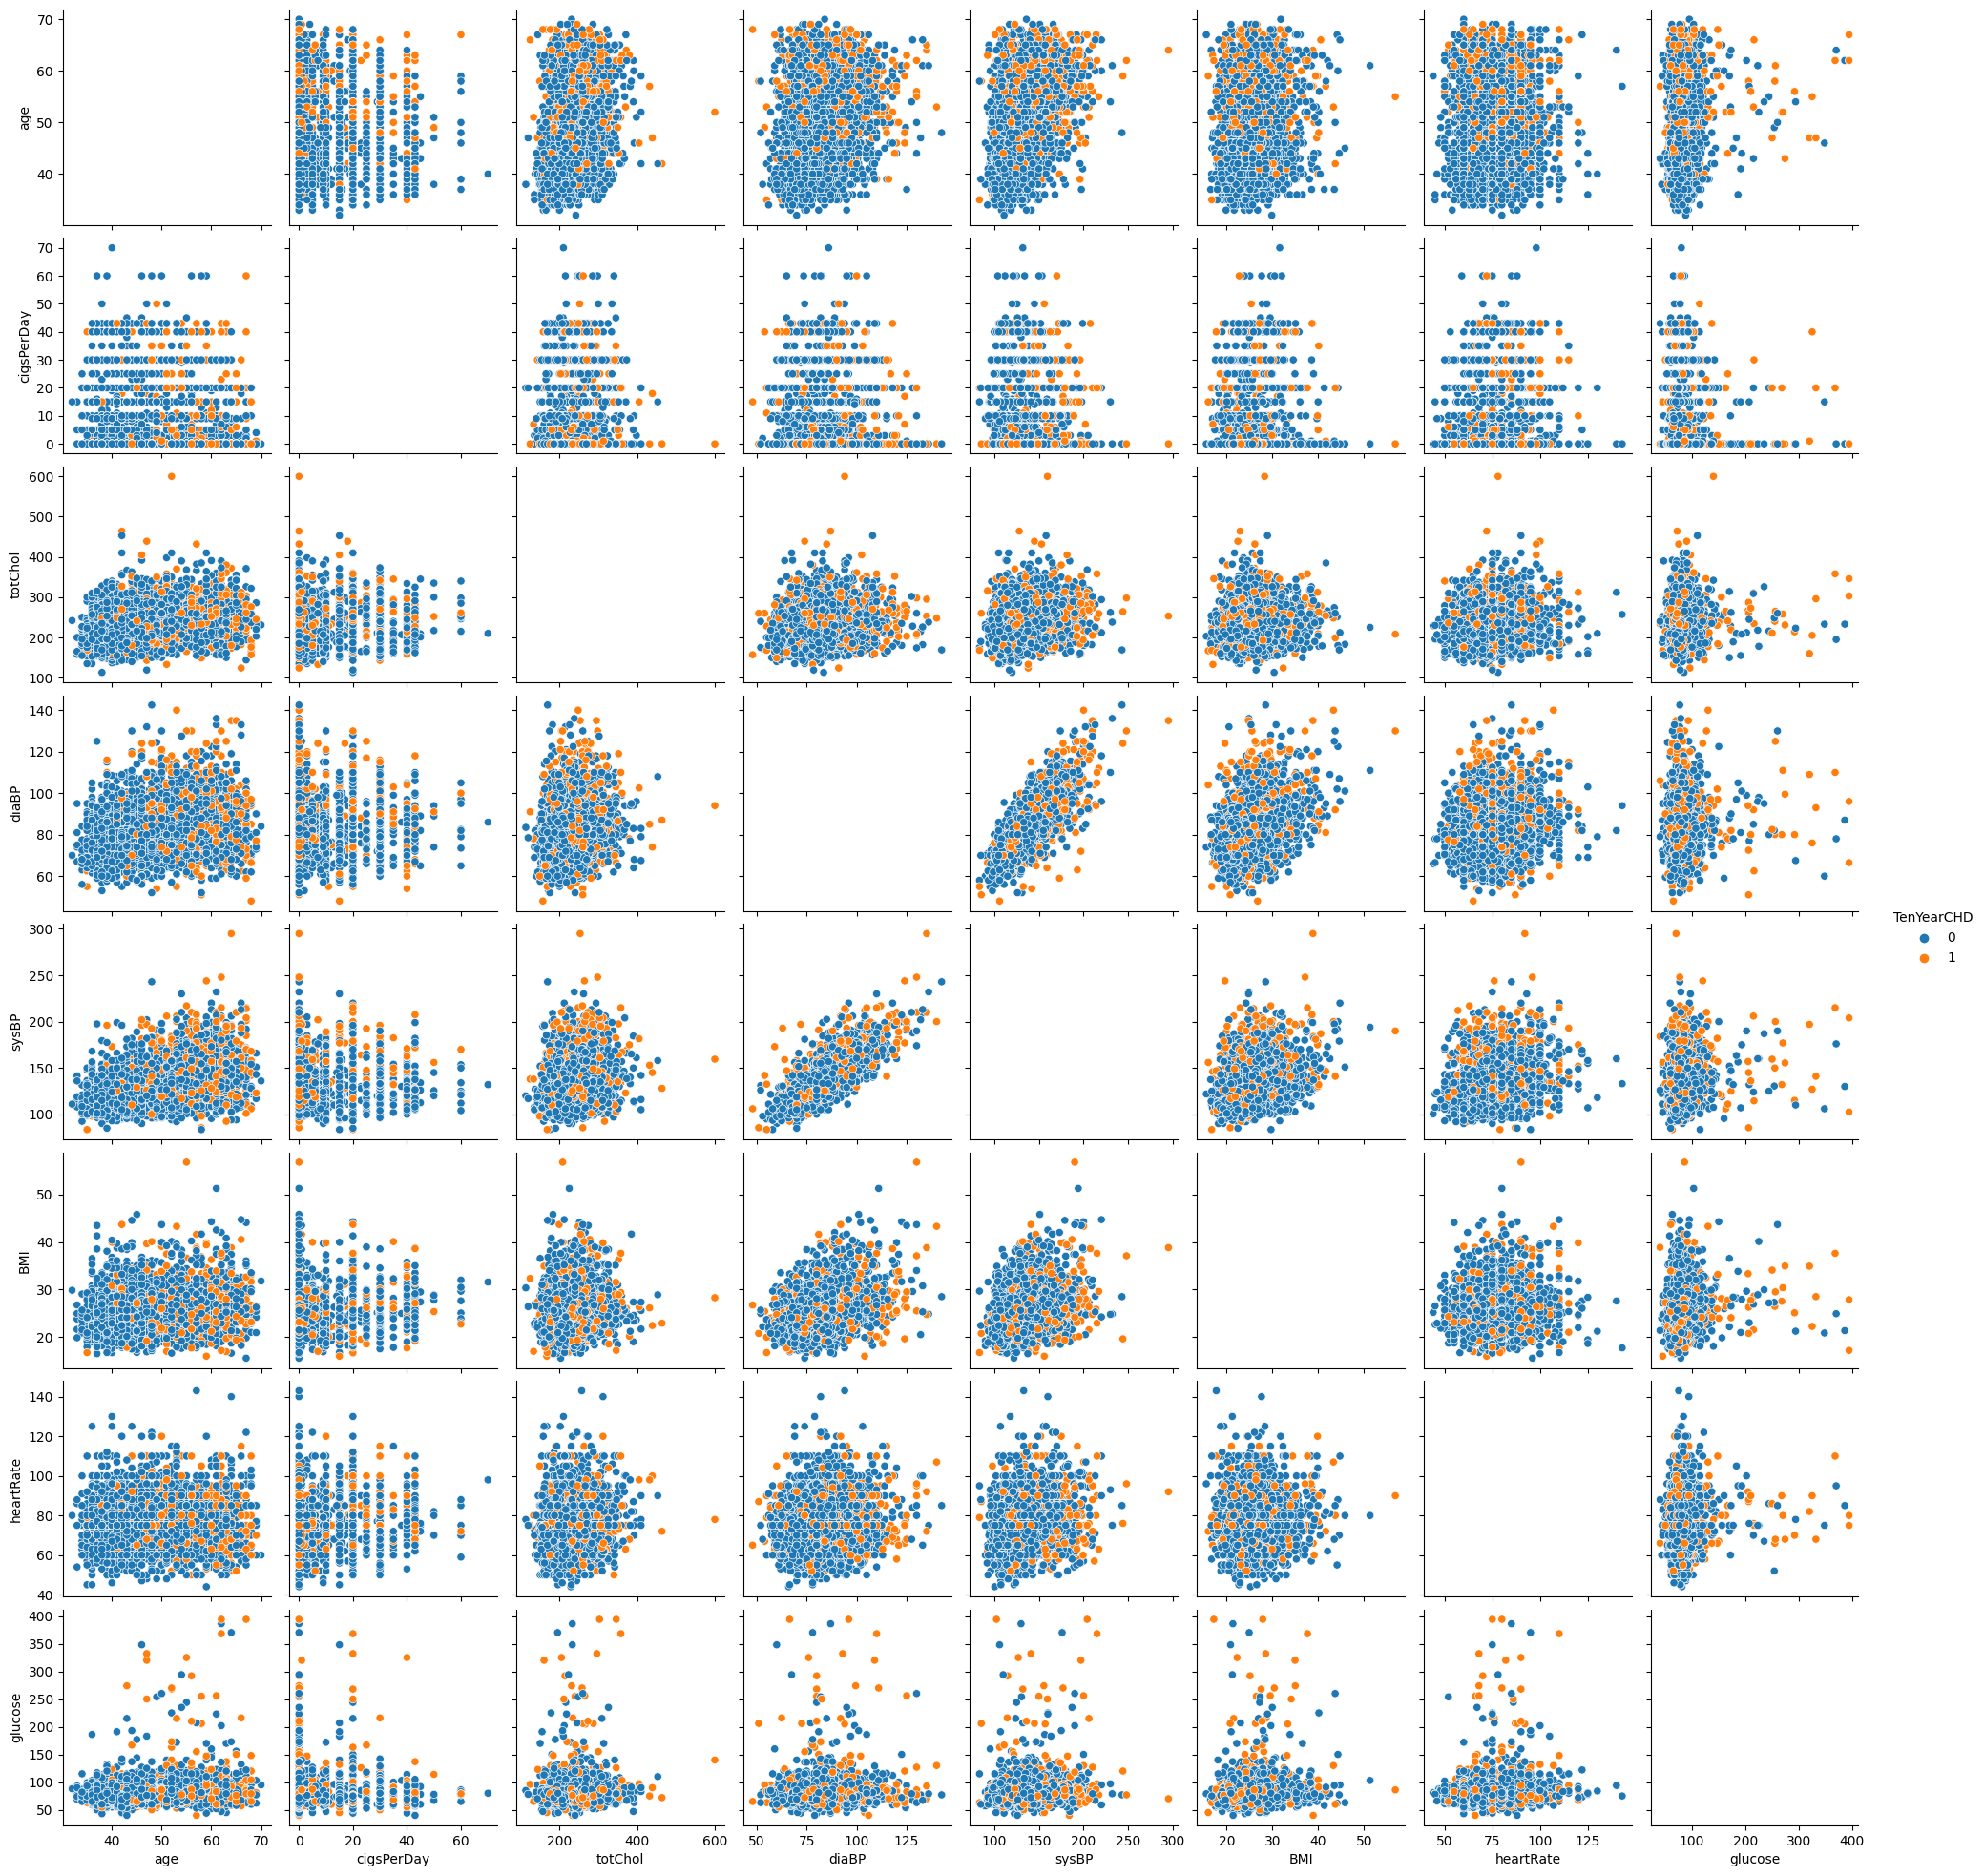

In [ ]:
sns.pairplot(data=df_num_feature, hue='TenYearCHD', diag_kind='scatter')
# The pair plot shows scatter plots for each pair of numerical variables
# and histograms along the diagonal for individual variables

<Axes: >

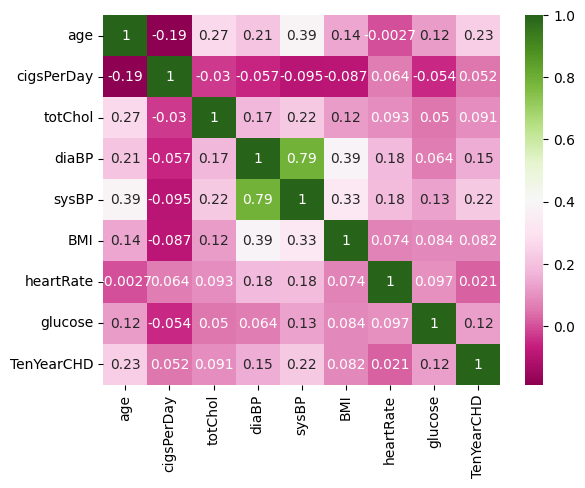

In [ ]:
# Correlation Coefficience
col=['age', 'cigsPerDay', 'totChol', 'diaBP', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
heatmap=np.corrcoef(df_num_feature[col].values.T)
sns.heatmap(heatmap, yticklabels=col, xticklabels=col, cmap='PiYG', annot=True)
#interestingly, cigsPerDay has almost no correlation

# Chi Square Testing


## Gender vs. TenYearCHD

In [ ]:
#Crosstab table
contigency = pd.crosstab(df['male'], df['TenYearCHD'])
contigency

TenYearCHD,0,1
male,,
0,1785,250
1,1316,307


In [ ]:
#Normalized crosstab table
contigency_pct = pd.crosstab(df['male'], df['TenYearCHD'], normalize='index')
contigency_pct

TenYearCHD,0,1
male,,
0,0.877150,0.122850
1,0.810844,0.189156


In [ ]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
c, p, dof

(30.24039576227628, 3.816765643320501e-08, 1)

In [ ]:
# p smaller than 0.05! -> The difference is statistically significant

## Education vs TenYearCHD

In [ ]:
#Crossbar Table
contigency= pd.crosstab(df['education'], df['TenYearCHD'])
contigency

TenYearCHD,0,1
education,,
1.0,1235,291
2.0,970,131
3.0,533,75
4.0,363,60


In [ ]:
# Normalized Crossbar Table
contigency_pct = pd.crosstab(df['education'], df['TenYearCHD'], normalize='index')
contigency_pct

TenYearCHD,0,1
education,,
1.0,0.809305,0.190695
2.0,0.881017,0.118983
3.0,0.876645,0.123355
4.0,0.858156,0.141844


In [ ]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
c, p, dof
# statistically significant!

(31.19947051126737, 7.716846010437298e-07, 3)

##Current Smoker vs TenYearCHD

In [ ]:
#Crossbar Table
contigency= pd.crosstab(df['currentSmoker'], df['TenYearCHD'])
contigency

TenYearCHD,0,1
currentSmoker,,
0,1597,272
1,1504,285


In [ ]:
#Normalized Crossbar Table
contigency_pct = pd.crosstab(df['currentSmoker'], df['TenYearCHD'], normalize='index')
contigency_pct

TenYearCHD,0,1
currentSmoker,,
0,0.854468,0.145532
1,0.840693,0.159307


In [ ]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
c, p, dof
# Current Smoker is not significant (in this sample size)

(1.2389725931725915, 0.2656691520743377, 1)

## Prevalent Stroke vs TenYearCHD


In [ ]:
#Crossbar Table
contigency= pd.crosstab(df['prevalentStroke'], df['TenYearCHD'])
contigency

TenYearCHD,0,1
prevalentStroke,,
0,3088,549
1,13,8


In [ ]:
#Normalized Crossbar Table
contigency_pct = pd.crosstab(df['prevalentStroke'], df['TenYearCHD'], normalize='index')
contigency_pct

TenYearCHD,0,1
prevalentStroke,,
0,0.849051,0.150949
1,0.619048,0.380952


In [ ]:
# Chi-square test of independence
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
c, p, dof
# this test shows that the difference is statistically significant
# samples are quite few, therefore results are to be interpretted with caution

(6.85924846211302, 0.00881836309704503, 1)

#Data Scaling and Splitting

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scale numerical variables
df_scaled = df.copy()
col_names = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
features = df_scaled[col_names]
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3.658000e+03,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3658.000000
mean,0.443685,-2.253225e-16,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,-2.680560e-16,-6.264353e-16,2.058981e-16,2.408619e-16,-1.204310e-16,-1.359705e-16,0.152269
std,0.496886,1.000137e+00,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,0.359331
min,0.000000,-2.050255e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.808870e+00,-2.212955e+00,-2.916407e+00,-2.519727e+00,-2.648667e+00,-1.751103e+00,0.000000
25%,0.000000,-8.821476e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.996275e-01,-6.960091e-01,-6.612613e-01,-6.648886e-01,-6.453088e-01,-4.540803e-01,0.000000
50%,0.000000,-6.447261e-02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.458662e-02,-1.979074e-01,-7.659402e-02,-9.908921e-02,-6.099616e-02,-1.612042e-01,0.000000
75%,1.000000,7.532023e-01,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,5.931342e-01,5.209438e-01,5.915972e-01,5.546551e-01,5.233165e-01,2.153507e-01,0.000000
max,1.000000,2.388552e+00,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,8.236304e+00,7.364181e+00,4.976602e+00,7.630223e+00,5.615184e+00,1.306006e+01,1.000000


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

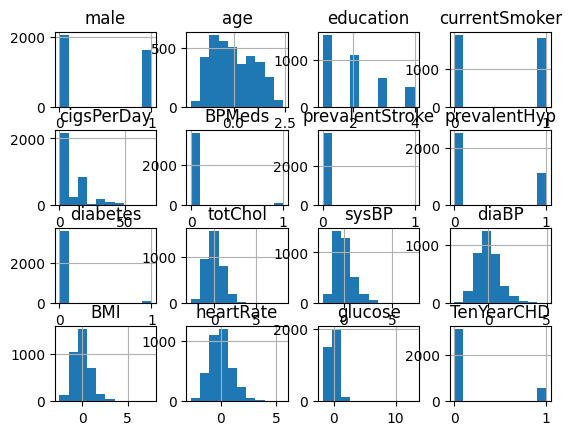

In [ ]:
df_scaled.hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('TenYearCHD',axis=1),df_scaled['TenYearCHD'], test_size=0.25, random_state=32)

# Logistic Regression - sklearn

In [ ]:
logit_model = LogisticRegression(solver='liblinear')
logit_model_result = logit_model.fit(X_train, y_train)
print(logit_model.classes_, logit_model.n_features_in_, logit_model.feature_names_in_, logit_model.coef_, logit_model.intercept_)

[0 1] 15 ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose'] [[ 0.51314532  0.51016094 -0.0400693   0.09584767  0.01453981  0.14000108
   0.75794907  0.26420665  0.02735683  0.13511562  0.3327148   0.00594523
  -0.06200066 -0.07220952  0.18420504]] [-2.38859673]


In [ ]:
predictions = logit_model.predict(X_train)

In [ ]:
print(classification_report(y_train, predictions))
print(confusion_matrix(y_train, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2323
           1       0.70      0.07      0.13       420

    accuracy                           0.85      2743
   macro avg       0.78      0.53      0.52      2743
weighted avg       0.83      0.85      0.80      2743

[[2310   13]
 [ 390   30]]


In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
validations = logit_model.predict(X_test)

In [ ]:
print(classification_report(y_test, validations))
print(confusion_matrix(y_test, validations))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       778
           1       0.75      0.11      0.19       137

    accuracy                           0.86       915
   macro avg       0.81      0.55      0.56       915
weighted avg       0.85      0.86      0.81       915

[[773   5]
 [122  15]]


In [ ]:
validations

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

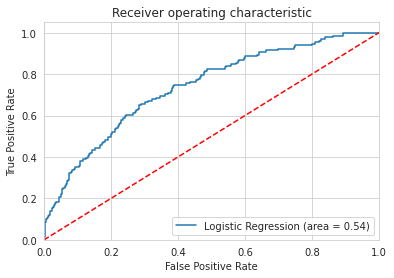

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Extra Gradient Boost (XG Boost)

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
predictions = xgb_clf.predict(X_train)

In [ ]:
print(classification_report(y_train, predictions))
print(confusion_matrix(y_train, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2316
           1       0.94      0.17      0.29       426

    accuracy                           0.87      2742
   macro avg       0.90      0.59      0.61      2742
weighted avg       0.88      0.87      0.83      2742

[[2311    5]
 [ 352   74]]


In [ ]:
validations = xgb_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validations))
print(confusion_matrix(y_test, validations))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       783
           1       0.53      0.06      0.11       131

    accuracy                           0.86       914
   macro avg       0.70      0.53      0.52       914
weighted avg       0.82      0.86      0.81       914

[[776   7]
 [123   8]]


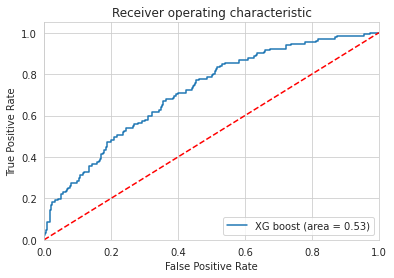

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [ ]:
rdf_model = RandomForestClassifier()

In [ ]:
rdf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = rdf_model.predict(X_train)

In [ ]:
print(classification_report(y_train, predictions))
print(confusion_matrix(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2316
           1       1.00      1.00      1.00       426

    accuracy                           1.00      2742
   macro avg       1.00      1.00      1.00      2742
weighted avg       1.00      1.00      1.00      2742

[[2316    0]
 [   0  426]]


In [ ]:
validation = rdf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, validation))
print(confusion_matrix(y_test, validation))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       783
           1       0.42      0.04      0.07       131

    accuracy                           0.85       914
   macro avg       0.64      0.51      0.50       914
weighted avg       0.80      0.85      0.80       914

[[776   7]
 [126   5]]
